### Metrics TR-MSE

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from utils import tr_mse_fit, tr_mse
from os import listdir
from PIL import Image

In [2]:
tmse = np.load('../data/sand/trend3/metrics/tmse.npy')
vmse = np.load('../data/sand/trend3/metrics/vmse.npy')

In [7]:
nn_out_list = listdir('trained_models/sand/trend2/nf32/nn_output')
N = len(nn_out_list)
r = 3
nn_nf32 = np.zeros(251)
err_nf32 = 0
err_arr_nf32 = np.zeros(251)
for file in tqdm_notebook(nn_out_list, desc='NN output'):
    image = Image.open('trained_models/sand/trend2/nf32/nn_output/' + file)
    error, error_arr, metric = tr_mse(image, tmse, r)
    nn_nf32 += metric
    err_arr_nf32 += error_arr
    err_nf32 += error
nn_nf32 /= N
err_arr_nf32 /= N
err_nf32 /= N

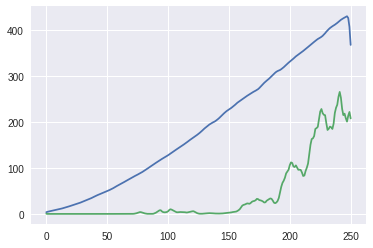

In [8]:
plt.plot(tmse)
plt.plot(nn_nf32)

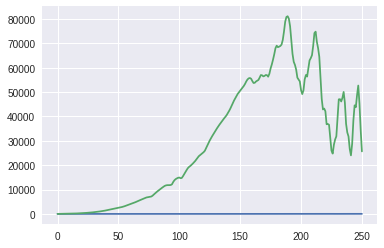

In [13]:
plt.plot(err_arr_nf32)
plt.plot((nn_nf32 - tmse)**2)

8.4307119088984468